<a href="https://colab.research.google.com/github/ritikaranganthan/GRIP-task1/blob/main/Copy_of_task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **GRIP OCTOBER 2021 BATCH**
## **TASK 1:PREDICTION USING SUPERVISED LEARNING**

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [ ]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data=pd.read_csv(url)

In [ ]:
#Find the shape of data
data.shape

(25, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data["Scores"]=data["Scores"].astype("float")

In [ ]:
data.dtypes

Hours     float64
Scores    float64
dtype: object

In [ ]:
print("Data imported successfully")
data.head()

Data imported successfully


,Hours,Scores
0,2.5,21.0
1,5.1,47.0
2,3.2,27.0
3,8.5,75.0
4,3.5,30.0


In [ ]:
#check null values
data.isnull().any()

Hours     False
Scores    False
dtype: bool

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

In [ ]:
x=data["Hours"]
y=data["Scores"]

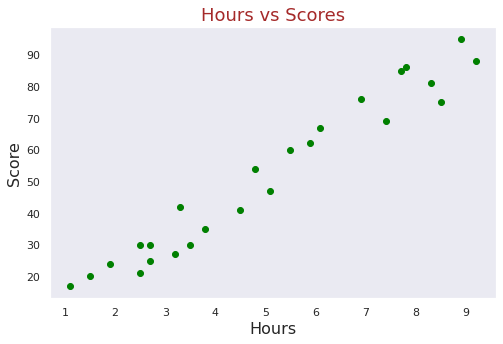

In [ ]:
# Plotting the distribution of scores
plt.figure(figsize=(8,5))
sns.set(palette="magma",style="dark")
plt.scatter(x,y,color ="green")
plt.title("Hours vs Scores",size=18,color="brown")  
plt.xlabel("Hours",size=16)  
plt.ylabel("Score",size=16)  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

No handles with labels found to put in legend.


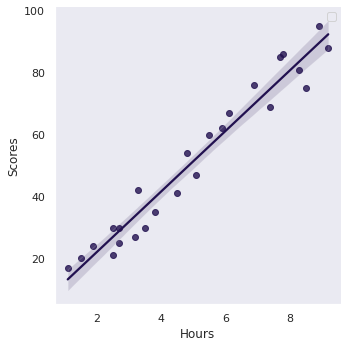

In [ ]:
sns.lmplot(x="Hours",y="Scores",data=data)
plt.legend()

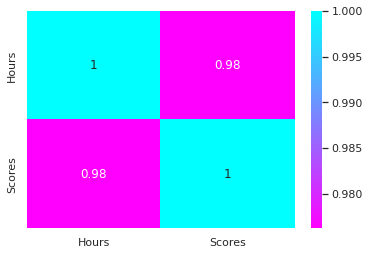

In [ ]:
#correlation
corr=data.corr()
sns.heatmap(corr,cmap="cool_r",annot=True)

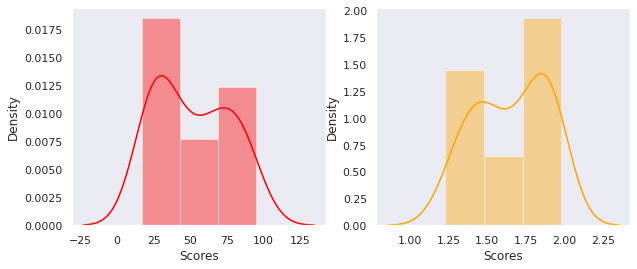

In [ ]:
#analysis for scores using log
f=plt.figure(figsize=(10,4))
ax=f.add_subplot(121)
sns.distplot(data["Scores"],color="red",ax=ax)
ax=f.add_subplot(122)
sns.distplot(np.log10(data["Scores"]),color="orange",ax=ax)
plt.show()

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [ ]:

from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


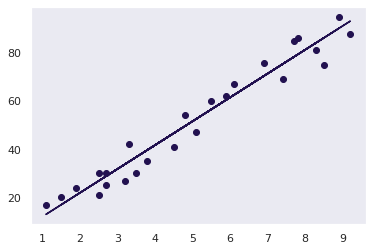

In [ ]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [ ]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20.0,16.884145
1,27.0,33.732261
2,69.0,75.357018
3,30.0,26.794801
4,62.0,60.491033


In [ ]:
# You can also test with your own data
hours = np.array([9.25])
hours = hours.reshape(-1,1)
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(float(hours)))
print("Predicted Score = {}".format(round(own_pred[0],2)))

No of Hours = 9.25
Predicted Score = 93.69


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
